On 30 October 2019, the US Federal Reserve voted to reduce the benchmark interest rate 25 basis points.  Assume you are a Portfolio Manger of a Gold ETF, and then assume you are a Portfolio Manager of an Equity ETF.  
Select a **gold Exchange Traded Fund**: **iShares Gold Trust** Ticker "IAU"  
Select an **equity ETF** from outside the US: **Amundi EURO STOXX 50 UCITS ETF-C EUR** Ticker "C50.MI"

In [ ]:
# iShares Gold Trust Ticker "IAU"
# Amundi EURO STOXX 50 UCITS ETF-C EUR Ticker "C50.MI"

# Data Importing    

In [ ]:
!pip install quandl
import fix_yahoo_finance as yf
import quandl
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, scale_y_continuous, labs, scale_x_date, theme_bw, theme, scale_color_manual
'''
Import closing daily interest rates of the 6 active benchmarks of US Treasury yields,
for the months of October 2019 and November 2019 (approximately 40 - 45 data points).
You will likely use 2-year, 3-year, 5-year, 7-year, 10-year, and 30-year maturities.
https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates
'''
with open('/content/api.txt', 'r') as file:
    api_file = file.read()

daily_interest_rates = quandl.get(["USTREASURY/YIELD.6","USTREASURY/YIELD.7","USTREASURY/YIELD.8","USTREASURY/YIELD.9",
                                   "USTREASURY/YIELD.10","USTREASURY/YIELD.12"], start_date="2019-10-01", end_date="2019-11-30", api_key=api_file)

#daily_interest_rates['USTREASURY/YIELD - 2 YR'] = yf.download('US2Y:U.S.','2019-10-01','2019-11-30')

# Import your gold ETF prices for the months of October 2019 and November 2019
data_gold_etf = yf.download('IAU','2019-10-01','2019-11-30')
print(data_gold_etf.tail())
# Import your equity ETF price for the months of October 2019 and November 2019
data_equity_etf = yf.download('C50.MI','2019-10-01','2019-11-30')
print(data_equity_etf.tail())

[*********************100%***********************]  1 of 1 downloaded
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2019-11-22  14.04  14.05  13.97  13.98      13.98  13684400
2019-11-25  13.94  13.96  13.90  13.91      13.91  11340900
2019-11-26  13.90  13.99  13.86  13.98      13.98  10558100
2019-11-27  13.91  13.93  13.88  13.91      13.91   9490300
2019-11-29  13.91  14.02  13.90  13.98      13.98   8800600
[*********************100%***********************]  1 of 1 downloaded
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-11-25  82.440002  82.459999  82.269997  82.449997  82.449997    5536
2019-11-26  82.320000  82.470001  82.169998  82.459999  82.459999    7841
2019-11-27  82.400002  82.730003  82.360001  82.529999  82.529999   34252
2019-11-28  82.320000  82.449997  82.309998  82.379997  82.379997    3

# 2. Data Processing

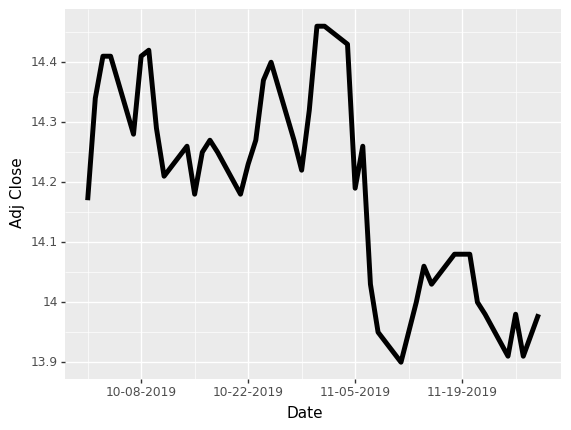

<ggplot: (8772206339567)>

In [ ]:
from google.colab import files
'''
data_gold_etf.loc[:, "Adj Close"].plot()
plt.savefig("gold_returns.jpg")
files.download("gold_returns.jpg")
'''
ggplot(data_gold_etf, aes(x='data_gold_etf.index', y='Adj Close')) + geom_line(size=2) + scale_x_date(date_breaks = "2 weeks", date_labels =  "%m-%d-%Y") + labs(x='Date')

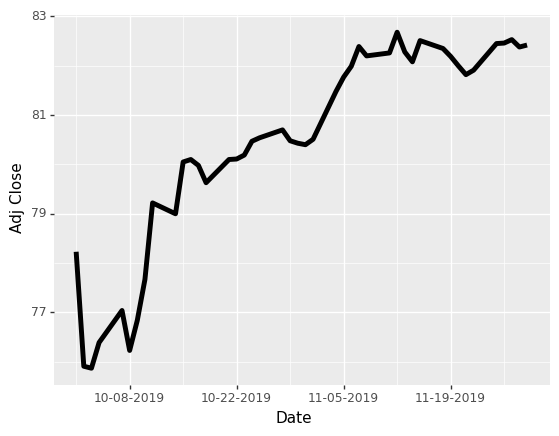

<ggplot: (-9223363264648930805)>

In [ ]:
#data_equity_etf.loc[:, "Adj Close"].plot()
ggplot(data_equity_etf, aes(x='data_equity_etf.index', y='Adj Close')) + geom_line(size=2) + scale_x_date(date_breaks = "2 weeks", date_labels =  "%m-%d-%Y") + labs(x='Date')

2.1 Compute the daily returns of Gold and Equity ETF.

In [ ]:
import pandas as pd

gold_returns = 100 * data_gold_etf["Adj Close"].pct_change().dropna()  
equity_returns = 100 * data_equity_etf["Adj Close"].pct_change().dropna()

print(gold_returns.head())
print(equity_returns.head())
#print(gold_returns.shape)
#print(equity_returns.shape)

Date
2019-10-02    1.199718
2019-10-03    0.488145
2019-10-04    0.000000
2019-10-07   -0.902151
2019-10-08    0.910364
Name: Adj Close, dtype: float64
Date
2019-10-02   -2.965613
2019-10-03   -0.052695
2019-10-04    0.685378
2019-10-07    0.850899
2019-10-08   -1.051399
Name: Adj Close, dtype: float64


# 3. Data Summaries

In [ ]:
# For the month of October, compute the average yield for each benchmark security.  Repeat the average calculation for November.
average_yield_october = daily_interest_rates[:'2019-10-31'].mean(axis=0)
average_yield_november = daily_interest_rates['2019-11-01':].mean(axis=0)
print('3.1 average Yield Benchmark for October:{}'.format(average_yield_october))
print('3.1 average Yield Benchmark for November:{}'.format(average_yield_november))

# For the month of October, compute the average price the Gold ETF.  Repeat the average calculation for November.
average_price_gold_ETF_october = data_gold_etf.loc[:'2019-10-31','Adj Close'].mean(axis=0)
average_price_gold_ETF_november = data_gold_etf.loc['2019-11-01':, 'Adj Close'].mean(axis=0)
print('3.2 average price gold ETF for October:{}'.format(average_price_gold_ETF_october))
print('3.2 average price gold ETF for November:{}'.format(average_price_gold_ETF_november))

# For the month of October, compute the average price the Equity ETF.  Repeat the average calculation for November.
average_price_equity_ETF_october = data_equity_etf.loc[:'2019-10-31','Adj Close'].mean(axis=0)
average_price_equity_ETF_november = data_equity_etf.loc['2019-11-01':,'Adj Close'].mean(axis=0)
print('3.3 average price equity ETF for October:{}'.format(average_price_equity_ETF_october))
print('3.3 average price equity ETF for November:{}'.format(average_price_equity_ETF_november))

# For the month of October, compute the standard deviation for each benchmark security.  Repeat the average calculation for November.
average_yield_std_october = daily_interest_rates[:'2019-10-31'].std(axis=0)
average_yield_std_november = daily_interest_rates['2019-11-01':].std(axis=0)
print('3.4 Standard Deviation Yield Benchmark for October:{}'.format(average_yield_std_october))
print('3.4 Standard Deviation Yield Benchmark for November:{}'.format(average_yield_std_november))
#print(average_yield_std_october)

# For the month of October, compute the standard deviation of the Gold ETF.  Repeat the average calculation for November.
average_std_gold_ETF_october = data_gold_etf.loc[:'2019-10-31','Adj Close'].std(axis=0)
average_std_gold_ETF_november = data_gold_etf.loc['2019-11-01':, 'Adj Close'].std(axis=0)
print('3.5 Standard Deviation gold ETF for October:{}'.format(average_std_gold_ETF_october))
print('3.5 Standard Deviation gold ETF for November:{}'.format(average_std_gold_ETF_november))

# For the month of October, compute the standard deviation of the Equity ETF.  Repeat the average calculation for November.
average_std_equity_ETF_october = data_equity_etf.loc[:'2019-10-31','Adj Close'].std(axis=0)
average_std_equity_ETF_november = data_equity_etf.loc['2019-11-01':, 'Adj Close'].std(axis=0)
print('3.6 Standard Deviation equity ETF for October:{}'.format(average_std_equity_ETF_october))
print('3.6 Standard Deviation equity ETF for November:{}'.format(average_std_equity_ETF_november))

3.1 average Yield Benchmark for October:USTREASURY/YIELD - 2 YR     1.551364
USTREASURY/YIELD - 3 YR     1.528182
USTREASURY/YIELD - 5 YR     1.525000
USTREASURY/YIELD - 7 YR     1.615000
USTREASURY/YIELD - 10 YR    1.706818
USTREASURY/YIELD - 30 YR    2.190455
dtype: float64
3.1 average Yield Benchmark for November:USTREASURY/YIELD - 2 YR     1.612632
USTREASURY/YIELD - 3 YR     1.612105
USTREASURY/YIELD - 5 YR     1.639474
USTREASURY/YIELD - 7 YR     1.735789
USTREASURY/YIELD - 10 YR    1.812105
USTREASURY/YIELD - 30 YR    2.280526
dtype: float64
3.2 average price gold ETF for October:14.29869565217391
3.2 average price gold ETF for November:14.063000000000002
3.3 average price equity ETF for October:78.93826147826087
3.3 average price equity ETF for November:82.12666642857143
3.4 Standard Deviation Yield Benchmark for October:USTREASURY/YIELD - 2 YR     0.080315
USTREASURY/YIELD - 3 YR     0.096443
USTREASURY/YIELD - 5 YR     0.104460
USTREASURY/YIELD - 7 YR     0.100653
USTREASURY/

# 4. Graphing

4.1 Graph the 6 benchmark securities for the 2 months on 1 plot.


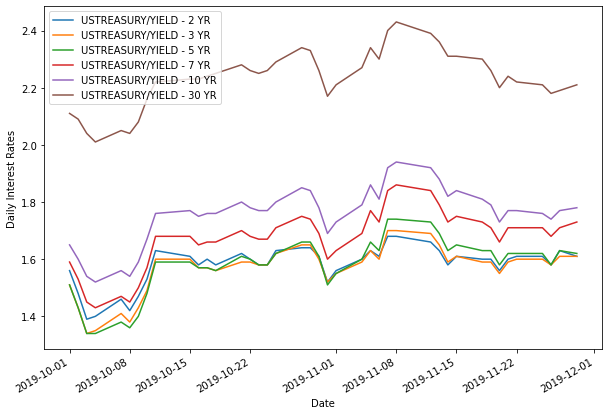

In [ ]:
# Graph the 6 benchmark securities for the 2 months on 1 plot.  That means the 6 yield series are overlaid on the same area.  Add a legend


print('4.1 Graph the 6 benchmark securities for the 2 months on 1 plot.')

daily_interest_rates.plot(kind="line", xlabel="Date", ylabel="Daily Interest Rates", figsize=(10,7))

4.2 and 4.3 Plot gold and equity ETF price


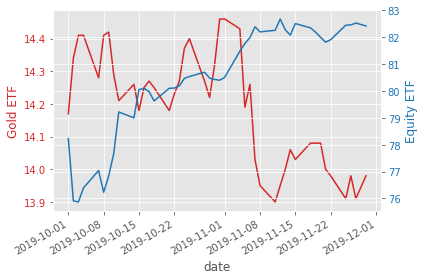

In [ ]:
'''
from plotnine import ggplot, aes, geom_line, scale_y_continuous, labs, scale_x_date, theme_bw, theme, scale_color_manual
daily_interest_rates_plot = ggplot(daily_interest_rates, aes(x='daily_interest_rates.index', color='variable')) + geom_line(aes(y='USTREASURY/YIELD - 2 YR'), color = "darkred") + geom_line(aes(y='USTREASURY/YIELD - 3 YR'), color='darkblue') + geom_line(aes(y='USTREASURY/YIELD - 5 YR'), color='orange') + geom_line(aes(y='USTREASURY/YIELD - 7 YR'), color='yellow') + geom_line(aes(y='USTREASURY/YIELD - 10 YR'), color='pink') + geom_line(aes(y='USTREASURY/YIELD - 30 YR'), color='brown') + scale_x_date(date_breaks = "2 weeks", date_labels =  "%m-%d-%Y") + labs(y = "Daily Interest Rate", color='Treasury Sec') + scale_color_manual(['r', 'b','a','d','t','g'])
print(daily_interest_rates_plot)

etf_price_plot = {ggplot(etf_data,aes(x='etf_data.index')) + geom_line(aes(y=etf_data.iloc[:, [3]].values), color = 'red') + 
                  geom_line(aes(y=etf_data.iloc[:, [9]].values), color = 'darkblue') + labs(x = "date") + 
                  scale_x_date(date_breaks = "2 weeks", date_labels =  "%m-%d-%Y") +
                  scale_y_continuous(name = "ETF Price")
}
                  #scale_y_continuous(name = "ETF equity price", sec.axis = sec_axis(*coefficinent, name="ETF gold price"))}
print(etf_price_plot)
'''
# On a separate graph, plot the gold ETF prices (not returns!) for the 2 months.  Use the left-side axis for the price label
from matplotlib.dates import MonthLocator, DateFormatter
print('4.2 and 4.3 Plot gold and equity ETF price')
etf_data = pd.concat([data_gold_etf, data_equity_etf],axis=1, join="inner")
months = MonthLocator()
plt.style.use('ggplot')
t = etf_data.index
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.xaxis.set_major_locator(months)
ax1.set_xlabel('date')
ax1.set_ylabel('Gold ETF', color=color)
ax1.plot(t, etf_data.iloc[:, [4]].values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.format_xdata = DateFormatter('%Y-%m-%d')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Equity ETF', color=color)
ax2.plot(t, etf_data.iloc[:, [10]].values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

# On the same graph, plot the equity ETF prices (not returns!) for the 2 months. 
# Be sure to use a separate scale, and the right-side axis for the price label
# Therefore, each series will show variation, even though they may be on very different price scales.

# 5. Fitting the Yield Curve  
Nelson-Siegel formula:  
$r(T) = \beta_0 + \beta_1*\frac{1-e^\frac{-T}{\tau}}{\frac{T}{\tau}} + \beta_2*(\frac{1-e^\frac{-T}{\tau}}{\frac{T}{\tau}} - e^\frac{-T}{\tau})$  
https://blog.deriscope.com/index.php/en/yield-curve-excel-quantlib-nelson-siegel-svensson  
http://janroman.dhis.org/stud/NS.pdf  
https://efmaefm.org/0EFMAMEETINGS/EFMA%20ANNUAL%20MEETINGS/2010-Aarhus%20old/EFMA2010_0387_fullpaper.pdf

In [ ]:
# There is no interest rates data for two days.
# https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2019
etf_data.index.difference(daily_interest_rates.index)

DatetimeIndex(['2019-10-14', '2019-11-11'], dtype='datetime64[ns]', name='Date', freq=None)

     |████████████████████████████████| 266kB 7.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 256kB 13.7MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81989 sha256=e123e8297cbbb1abccd08a03331ddce9410a71896539da943579c01593367db2
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl size=17286 sha256=b559b0d94692f1e903ec8f10b87b3004bb0e13345f6c6f7332e4a7d65344cc40
  Stored in directory: /root/.cache/pip/wheels/53/9d/3b/da1ff15feb7d97bb195837f4e78f971c748a945bd4720003ce
Successfully built lmfit asteval


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


{'beta0': 2.536372582966818, 'beta1': -0.8156848652259175, 'beta2': -1.8822282947057218, 'tau': 3.8523119819210936}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


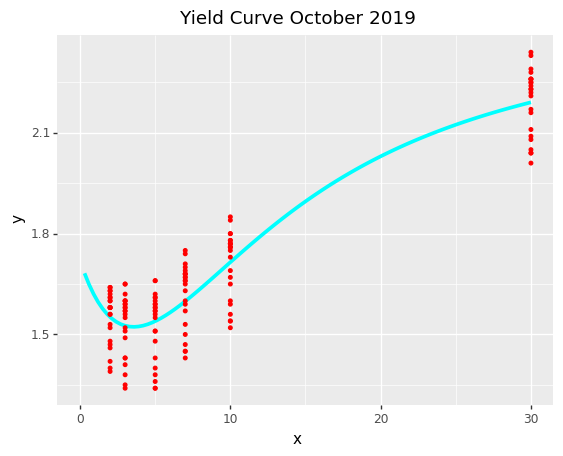

<ggplot: (8772194825571)>
{'beta0': 2.6556302028513383, 'beta1': -1.0007461564393618, 'beta2': -1.4332470485064077, 'tau': 4.665402719603734}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


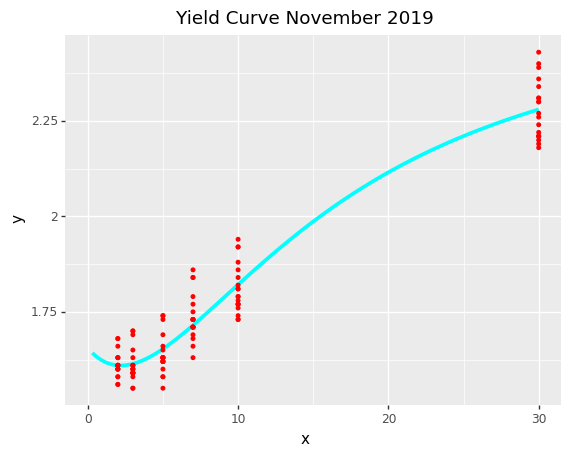

<ggplot: (8772194781588)>


In [ ]:
# Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve.  Write out the equation.
# https://pypi.org/project/lmfit/
# https://lmfit.github.io/lmfit-py/model.html
!pip install lmfit
import numpy as np
from lmfit import Model
from plotnine import stat_function, geom_point, ggtitle

maturities = np.array([2,3,5,7,10,30])
y = np.array([
    daily_interest_rates['USTREASURY/YIELD - 2 YR'][0],
    daily_interest_rates['USTREASURY/YIELD - 3 YR'][0],
    daily_interest_rates['USTREASURY/YIELD - 5 YR'][0],
    daily_interest_rates['USTREASURY/YIELD - 7 YR'][0],
    daily_interest_rates['USTREASURY/YIELD - 10 YR'][0],
    daily_interest_rates['USTREASURY/YIELD - 30 YR'][0]
])
'''
def nelson_siegel_svensson(X,beta0,beta1,beta2,beta3,tau,tau2):
  return beta0 + (beta1*(1-np.exp(-X/tau))/(X/tau)) + beta2 * ((1-np.exp(-X/tau))/(X/tau) - np.exp(-X/tau)) + beta3 * ((1-np.exp(-X/tau2))/(X/tau2) - np.exp(-X/tau2))

NSS_model = Model(nelson_siegel_svensson)
print('parameter names: {}'.format(NSS_model.param_names))
print('independent variables: {}'.format(NSS_model.independent_vars))

params = NSS_model.make_params(beta0=2,beta1=-0.5,beta2=-1,beta3=1,tau=4,tau2=30)
result = NSS_model.fit(y, params, X=maturities)
print(result.best_values)
'''
def nelson_siegel(X,beta0,beta1,beta2,tau):
  return beta0 + (beta1*(1-np.exp(-X/tau))/(X/tau)) + beta2 * ((1-np.exp(-X/tau))/(X/tau) - np.exp(-X/tau))

NS_model = Model(nelson_siegel)
'''
print('parameter names: {}'.format(NS_model.param_names))
print('independent variables: {}'.format(NS_model.independent_vars))
params = NS_model.make_params(beta0=2,beta1=-0.5,beta2=-1,tau=4)
result = NS_model.fit(y, params, X=maturities)
print(result.best_values)

beta0 = result.best_values['beta0']
beta1 = result.best_values['beta1']
beta2 = result.best_values['beta2']
# beta3 = result.best_values['beta3']
tau = result.best_values['tau']
# tau2 = result.best_values['tau2']

print(ggplot() + 
stat_function(pd.DataFrame(data={"x": [0, 30]}), aes(x="x"),fun=lambda T: beta0 + (beta1*(1-np.exp(-T/tau))/(T/tau)) + beta2 * ((1-np.exp(-T/tau))/(T/tau) - np.exp(-T/tau)), color = 'cyan', size = 1.5) +
geom_point(pd.DataFrame(data={'x':maturities, 'y':y}), aes(x='x', y='y'), color='red', size = 2) + ggtitle("Yield Curve October 1st, 2019"))
'''
# Fit the yield curve each day using the 6 benchmark yields for the October and November data

yield_curve_parameters = pd.Series([])
for index in range(len(daily_interest_rates)):
  params = NS_model.make_params(beta0=2,beta1=-0.5,beta2=-1,tau=4)
  y = np.array([
    daily_interest_rates['USTREASURY/YIELD - 2 YR'][index],
    daily_interest_rates['USTREASURY/YIELD - 3 YR'][index],
    daily_interest_rates['USTREASURY/YIELD - 5 YR'][index],
    daily_interest_rates['USTREASURY/YIELD - 7 YR'][index],
    daily_interest_rates['USTREASURY/YIELD - 10 YR'][index],
    daily_interest_rates['USTREASURY/YIELD - 30 YR'][index]
])
  result = NS_model.fit(y, params, X=maturities)
  yield_curve_parameters[index] = result.best_values

yield_curve_parameters.index = daily_interest_rates.index
daily_interest_rates['Yield Curve Parameters'] = yield_curve_parameters

# Fitting the Yield Curve for October and November
y_october = np.array([
    daily_interest_rates['USTREASURY/YIELD - 2 YR'][:"2019-11-01"],
    daily_interest_rates['USTREASURY/YIELD - 3 YR'][:"2019-11-01"],
    daily_interest_rates['USTREASURY/YIELD - 5 YR'][:"2019-11-01"],
    daily_interest_rates['USTREASURY/YIELD - 7 YR'][:"2019-11-01"],
    daily_interest_rates['USTREASURY/YIELD - 10 YR'][:"2019-11-01"],
    daily_interest_rates['USTREASURY/YIELD - 30 YR'][:"2019-11-01"]
])
y_november = np.array([
    daily_interest_rates['USTREASURY/YIELD - 2 YR']["2019-11-01":],
    daily_interest_rates['USTREASURY/YIELD - 3 YR']["2019-11-01":],
    daily_interest_rates['USTREASURY/YIELD - 5 YR']["2019-11-01":],
    daily_interest_rates['USTREASURY/YIELD - 7 YR']["2019-11-01":],
    daily_interest_rates['USTREASURY/YIELD - 10 YR']["2019-11-01":],
    daily_interest_rates['USTREASURY/YIELD - 30 YR']["2019-11-01":]
])
params = NS_model.make_params(beta0=2,beta1=-0.5,beta2=-1,tau=4)
maturities_october = np.array([[2,3,5,7,10,30],]*23).transpose()
result_october = NS_model.fit(y_october, params, X=maturities_october)
print(result_october.best_values)
beta0 = result_october.best_values['beta0']
beta1 = result_october.best_values['beta1']
beta2 = result_october.best_values['beta2']
tau = result_october.best_values['tau']
print(ggplot() + 
stat_function(pd.DataFrame(data={"x": [0, 30]}), aes(x="x"),fun=lambda T: beta0 + (beta1*(1-np.exp(-T/tau))/(T/tau)) + beta2 * ((1-np.exp(-T/tau))/(T/tau) - np.exp(-T/tau)), color = 'cyan', size = 1.5) +
geom_point(pd.DataFrame(data={'x':maturities_october.flatten('F'), 'y':y_october.flatten('F')}), aes(x='x', y='y'), color='red', size = 1) + ggtitle("Yield Curve October 2019"))

maturities_november = np.array([[2,3,5,7,10,30],]*19).transpose()
result_november = NS_model.fit(y_november, params, X=maturities_november)
print(result_november.best_values)
beta0 = result_november.best_values['beta0']
beta1 = result_november.best_values['beta1']
beta2 = result_november.best_values['beta2']
tau = result_november.best_values['tau']
print(ggplot() + 
stat_function(pd.DataFrame(data={"x": [0, 30]}), aes(x="x"),fun=lambda T: beta0 + (beta1*(1-np.exp(-T/tau))/(T/tau)) + beta2 * ((1-np.exp(-T/tau))/(T/tau) - np.exp(-T/tau)), color = 'cyan', size = 1.5) +
geom_point(pd.DataFrame(data={'x':maturities_november.flatten('F'), 'y':y_november.flatten('F')}), aes(x='x', y='y'), color='red', size = 1) + ggtitle("Yield Curve November 2019"))

5.4 Confronting the two plots, the drop in 3 years Treasury Bonds was signficantly reduced. In addition to that, long term interest dropped around 0.25 percent, as expected by the FED decision.

# 6. Modeling Prices  
To select the best paramaterers for ARIMA models, we should first check for stationarity.

## Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Gold ETF October:')
gold_adf_test_october = adfuller(gold_returns[:"2019-11-01"])
print('ADF Statistic: {:.6f}'.format(gold_adf_test_october[0]))
print('p-value: {:.6f}'.format(gold_adf_test_october[1]))
print('critical Value: {}'.format(gold_adf_test_october[4]))
print('Gold ETF November:')
gold_adf_test_november = adfuller(gold_returns["2019-11-01":])
print('ADF Statistic: {:.6f}'.format(gold_adf_test_november[0]))
print('p-value: {:.6f}'.format(gold_adf_test_november[1]))
print('critical Value: {}'.format(gold_adf_test_november[4]))

print('Equity ETF October:')
equity_adf_test_october = adfuller(equity_returns[:"2019-11-01"])
print('ADF Statistic: {:.6f}'.format(equity_adf_test_october[0]))
print('p-value: {:.6f}'.format(equity_adf_test_october[1]))
print('critical Value: {}'.format(equity_adf_test_october[4]))
print('Equity ETF November:')
equity_adf_test_november = adfuller(equity_returns["2019-11-01":])
print('ADF Statistic: {:.6f}'.format(equity_adf_test_november[0]))
print('p-value: {:.6f}'.format(equity_adf_test_november[1]))
print('critical Value: {}'.format(equity_adf_test_november[4]))

Gold ETF October:
ADF Statistic: -2.894118
p-value: 0.046036
critical Value: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
Gold ETF November:
ADF Statistic: -0.586713
p-value: 0.873956
critical Value: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
Equity ETF October:
ADF Statistic: -4.115531
p-value: 0.000913
critical Value: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
Equity ETF November:
ADF Statistic: -3.919298
p-value: 0.001897
critical Value: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}


EQUITY LOG RETURNS are stationary because ADF statisics is lower than the 1% bound and *p*-value is significant.  
GOLD ETF RETURNS are not stationary because ADF statistics is higher than the 5% bound.  
When time series are not stationary, we shoudl differencing the time series and check again if it's stationary.  
In the following cell, we go through an exaple with November Gold ETF returns.

ADF Statistic: -7.219742
p-value: 0.000000
Critical Value: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


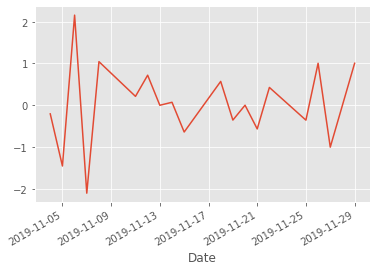

In [ ]:
# Differencing

from statsmodels.tsa.stattools import adfuller

gold_diff = gold_returns["2019-11-01":].diff().dropna()

gold_adf_diff = adfuller(gold_diff)
print("ADF Statistic: {:.6f}".format(gold_adf_diff[0]))
print("p-value: {:.6f}".format(gold_adf_diff[1]))
print("Critical Value: {}".format(gold_adf_diff[4]))
gold_diff.plot()

After differencing once, we can see that November Gold ETF returns become stationary because ADF is lower than 1% bound. Also the graphs shows that the time series variance is stationary over time.  
  
We now use auto-arima to get the best model parameters. The pyramid arima package selects the best model by choosing the one with the lowest AIC value.

In [ ]:
!pip install pmdarima

import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

     |████████████████████████████████| 1.5MB 9.2MB/s 
     |████████████████████████████████| 2.1MB 36.5MB/s 
     |████████████████████████████████| 9.5MB 13.6MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
arimamodel(gold_returns[:"2019-11-01"]).summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=45.978, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47.897, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47.716, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44.485, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.408 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:                        SARIMAX   Log Likelihood                 -21.242
Date:                Mon, 11 Jan 2021   AIC                             44.485
Time:                        17:10:53   BIC                             45.620
Sample:                             0   HQIC                            44.771
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3713      0.150      2.483      0.013       0.078       0.664
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.83
Prob(Q):                               nan   Prob(JB):                         0.66
Heteroskedasticity (H):               0.67   Skew:                            -0.10
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arimamodel(gold_returns["2019-11-01":]).summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=74.440, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=53.113, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=50.114, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=50.013, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=52.000, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=51.767, Time=0.06 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.844 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -21.007
Date:                Mon, 11 Jan 2021   AIC                             50.013
Time:                        17:10:54   BIC                             53.575
Sample:                             0   HQIC                            50.504
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5087      0.309     -4.881      0.000      -2.115      -0.903
ar.L2         -1.0812      0.405     -2.670      0.008      -1.875      -0.287
ar.L3         -0.4333      0.298     -1.455      0.146      -1.017       0.151
sigma2         0.5262      0.201      2.611      0.009       0.131       0.921
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.45
Prob(Q):                               nan   Prob(JB):                         0.48
Heteroskedasticity (H):               0.27   Skew:                             0.64
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arimamodel(equity_returns[:"2019-11-01"]).summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71.663, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=70.070, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=68.625, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=70.006, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=70.658, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.507 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -31.313
Date:                Mon, 11 Jan 2021   AIC                             68.625
Time:                        17:10:54   BIC                             71.899
Sample:                             0   HQIC                            69.396
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0353      0.149      0.237      0.813      -0.257       0.328
ma.L1         -0.7290      0.257     -2.835      0.005      -1.233      -0.225
sigma2         0.9746      0.416      2.342      0.019       0.159       1.790
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 2.06
Prob(Q):                               nan   Prob(JB):                         0.36
Heteroskedasticity (H):               0.03   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arimamodel(equity_returns["2019-11-01":]).summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=51.837, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=48.072, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=35.744, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=37.114, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=37.738, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.601 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -14.872
Date:                Mon, 11 Jan 2021   AIC                             35.744
Time:                        17:10:55   BIC                             38.577
Sample:                             0   HQIC                            36.223
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9625      0.257     -3.743      0.000      -1.467      -0.458
ar.L2         -0.7700      0.159     -4.846      0.000      -1.082      -0.459
sigma2         0.2502      0.161      1.550      0.121      -0.066       0.567
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.91
Prob(Q):                               nan   Prob(JB):                         0.64
Heteroskedasticity (H):               1.21   Skew:                            -0.06
Prob(H) (two-sided):                  0.82   Kurtosis:                         1.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Box Jenkins Method  
Instead of using auto-arima, we could have checked ACF and PACF for each stationary time series and see what the plot suggest.

In [ ]:
gold_returns_october = gold_returns[:"2019-10-31"]
gold_returns_november = gold_returns["2019-11-01":]
#print(gold_returns_october.shape)
#print(gold_returns_november.shape)

In [ ]:
equity_returns_october = equity_returns[:"2019-10-31"]
equity_returns_november = equity_returns["2019-11-01":]
#print(equity_returns_october.shape)
#print(equity_returns_november.shape)

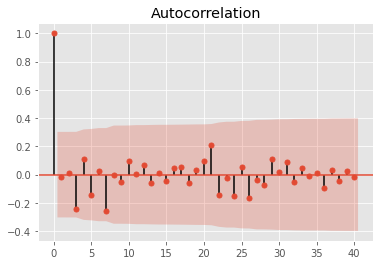

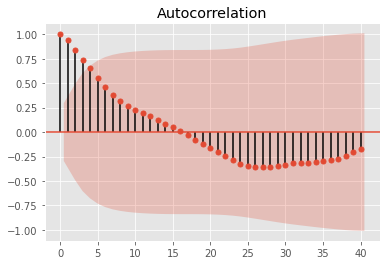

In [ ]:
#ACF
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
acf_plot = plot_acf(gold_returns, lags = 40)
acf_plot = plot_acf(data_equity_etf['Adj Close'], lags = 40)

Based on decaying ACF,we are likely dealing with an AR process.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  Default is None.


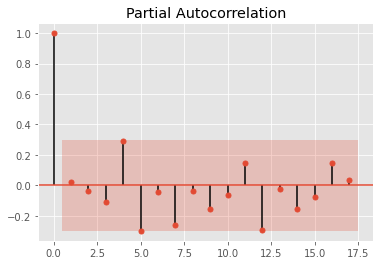

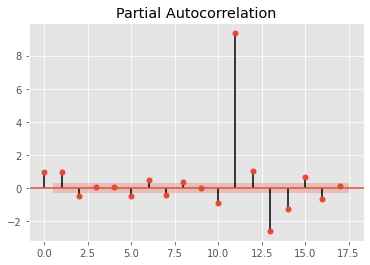

In [ ]:
#PACF
pacf_plot = plot_pacf(equity_returns)
pacf_plot = plot_pacf(data_equity_etf['Adj Close'])

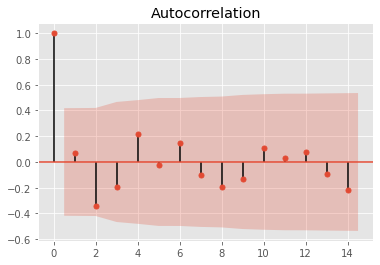

In [ ]:
# ACf plot for October gold returns

plot_acf(gold_returns_october)
plt.show()

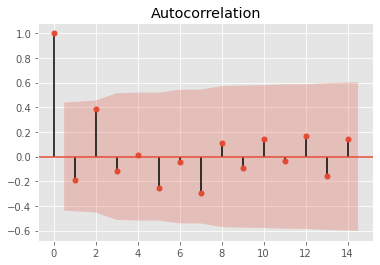

In [ ]:
# ACF plot for November gold returns

plot_acf(gold_returns_november)
plt.show()

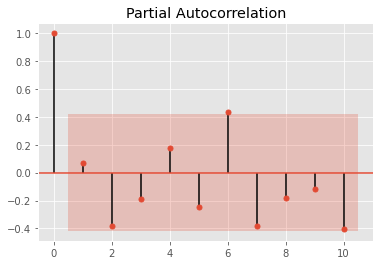

In [ ]:
# PACF plot for October gold returns

plot_pacf(gold_returns_october, lags=10)
plt.show()

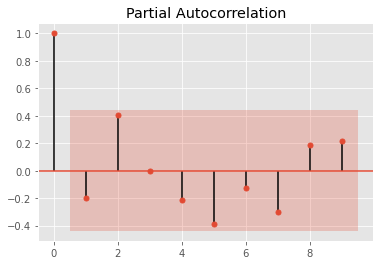

In [ ]:
# PACF plot for November gold returns

plot_pacf(gold_returns_november, lags=9)
plt.show()

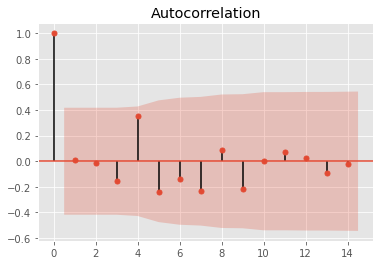

In [ ]:
# ACF plot for october equity returns

plot_acf(equity_returns_october)
plt.show()

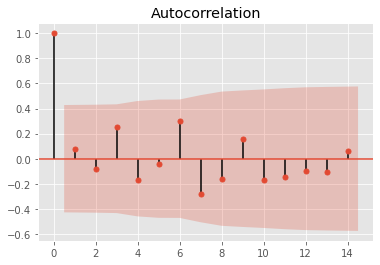

In [ ]:
# ACF plot for November equity returns

plot_acf(equity_returns_november)
plt.show()

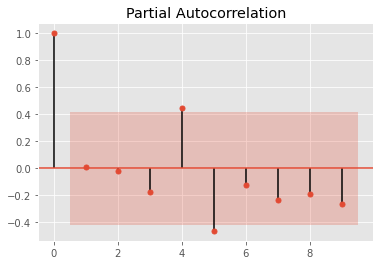

In [ ]:
# PACF plot for october equity returns

plot_pacf(equity_returns_october, lags=9)
plt.show()

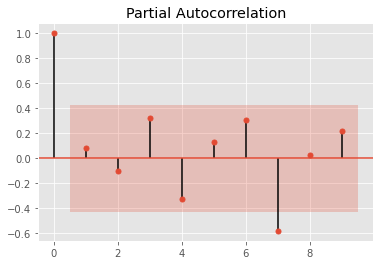

In [ ]:
# PACF plot for november equity returns

plot_pacf(equity_returns_november, lags=9)
plt.show()

6.4 Based on the auto-arima models, ACF and PACF plots and the notes of the course we choose the following parameters and implement ARIMA models for each time series.

In [ ]:
import statsmodels.api as sm

def arma_model(data, order):
    process_data = data.values.reshape(-1)
    arma_data = sm.tsa.ARIMA(process_data, list(order)).fit()
    return arma_data
    

# Using the October gold ETF prices, run an ARMA model with your choice of parameters.
#arma_gold_october = arma_model(gold_october_etf['Adj Close'], (1,0,0))
arma_gold_october = arma_model(gold_returns[:"2019-11-01"], (0,0,0))
# Using the November gold ETF prices, run an ARMA model with your choice of parameters.
#arma_gold_november = arma_model(gold_november_etf, (1,0,0))
arma_gold_november = arma_model(gold_returns["2019-11-01":], (2,2,0))

# Using the October equity ETF prices, run an ARMA model with your choice of parameters.
#arma_equity_october = arma_model(equity_october_etf, (1,0,0))
arma_equity_october = arma_model(equity_returns[:"2019-11-01"], (0,1,0))
# Using the November equity ETF prices, run an ARMA model with your choice of parameters.
#arma_equity_november = arma_model(equity_november_etf, (1,0,0))
arma_equity_november = arma_model(equity_returns["2019-11-01":], (2,2,0))
# In each case, justify which model is best


# What are the significant changes, if any?  Be specific with regards to the values of the parameters!

In [ ]:
print(arma_gold_october.summary())
print(arma_gold_november.summary())
print(arma_equity_october.summary())
print(arma_equity_november.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   23
Model:                     ARMA(0, 0)   Log Likelihood                 -20.989
Method:                           css   S.D. of innovations              0.603
Date:                Mon, 11 Jan 2021   AIC                             45.978
Time:                        17:10:58   BIC                             48.249
Sample:                             0   HQIC                            46.550
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0899      0.126      0.716      0.482      -0.156       0.336
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observat

6.4 Observing the results of the ARIMA models, we find that the last ARIMA(2,2,0) model is the model that performs the better. We come up with this conclusion looking at the values provided by the three different information criteria:
1. AIC = 37.738
2. BIC = 41.516
3. HQIC = 38.378

These values were recorded to be the lowest, and were produced by the ARIMA(2,2,0) model, hence our choice.



6.5 What are the significant changes, if any?  
The equity ETF  time series change significantly from October to November.  
In particular the Moving Average part was wiped out in November and if focuses on the Auto Regressive part.  
The Gold ETF time series parameters changed very little showing more stability over time.

# 7. Modelling Volatility

In [ ]:
## 7.1 Using gold ETF prices, find the daily high minus low for each month.  Compute the average for October.  Compute the average for November.
data_gold_etf['HML'] = data_gold_etf['High'] - data_gold_etf['Low']
data_equity_etf['HML'] = data_equity_etf['High'] - data_equity_etf['Low']
gold_etf_HML_october_average = data_gold_etf['HML'][:'2019-11-01'].mean()
gold_etf_HML_november_average = data_gold_etf['HML']['2019-11-01':].mean()
equity_etf_HML_october_average = data_equity_etf['HML'][:'2019-11-01'].mean()
equity_etf_HML_november_average = data_equity_etf['HML']['2019-11-01':].mean()
print('gold_etf_HML_october_average:{}'.format(gold_etf_HML_october_average))
print('gold_etf_HML_november_average:{}'.format(gold_etf_HML_november_average))
print('equity_etf_HML_october_average:{}'.format(equity_etf_HML_october_average))
print('equity_etf_HML_november_average:{}'.format(equity_etf_HML_november_average))

# 7.2 Using the gold ETF returns, find the standard deviation for October. Repeat for November
std_gold_etf_return_october = gold_returns[:'2019-11-01'].std()
std_gold_etf_return_november = gold_returns['2019-11-01':].std()
std_equity_etf_return_october = equity_returns[:'2019-11-01'].std()
std_equity_etf_return_november = equity_returns['2019-11-01':].std()
print('std_gold_etf_return_october:{}'.format(std_gold_etf_return_october))
print('std_gold_etf_return_november:{}'.format(std_gold_etf_return_november))
print('std_equity_etf_return_october:{}'.format(std_equity_etf_return_october))
print('std_equity_etf_return_november:{}'.format(std_equity_etf_return_november))

gold_etf_HML_october_average:0.10999999999999995
gold_etf_HML_november_average:0.10299999999999994
equity_etf_HML_october_average:0.6641658333333348
equity_etf_HML_november_average:0.4590489523809531
std_gold_etf_return_october:0.6162275265696877
std_gold_etf_return_november:0.6289819887280752
std_equity_etf_return_october:0.9339530026955897
std_equity_etf_return_november:0.3977006591921596


Check for stationarity and difference the series.

In [ ]:
from statsmodels.tsa.stattools import adfuller
# chech for stationarity
def check_stationarity(data):
  adf_test = adfuller(data)
  print('ADF Statistic: {:.6f}'.format(adf_test[0]))
  print('p-value: {:.6f}'.format(adf_test[1]))
  print('critical Value: {}'.format(adf_test[4]))

In [ ]:
# difference estimator
!pip install pmdarima

from pmdarima.arima import ndiffs

def difference_estimator(data):
    kpss_diffs = ndiffs(data, alpha=0.05, test='kpss', max_d=6)
    adf_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
    n_diffs = max(adf_diffs, kpss_diffs)
    return f"Estimated differencing term: {n_diffs}"

In [ ]:
check_stationarity(gold_returns)

ADF Statistic: -4.649228
p-value: 0.000105
critical Value: {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}


In [ ]:
difference_estimator(gold_returns)

'Estimated differencing term: 1'

In [ ]:
gold_returns_diff = gold_returns.diff().dropna() # differencing the gold returns once as suggested by the difference estimator function above

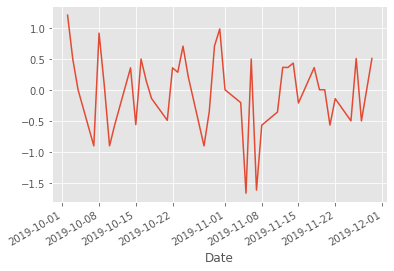

In [ ]:
# plot of the original gold returns series
gold_returns.plot()

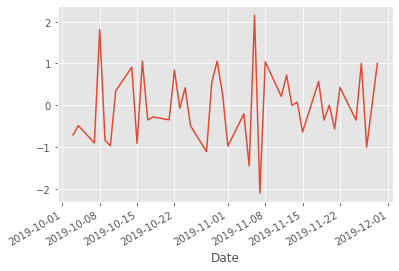

In [ ]:
# plot the differenced gold returns series
gold_returns_diff.plot() # this looks more stationary

In [ ]:
check_stationarity(equity_returns)

ADF Statistic: -8.248532
p-value: 0.000000
critical Value: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}


In [ ]:
difference_estimator(equity_returns)

'Estimated differencing term: 1'

In [ ]:
equity_returns_diff = equity_returns.diff().dropna() # differencing the gold returns once as suggested by the difference estimator function above

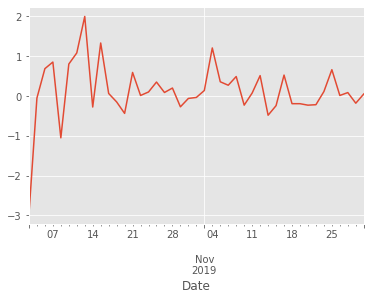

In [ ]:
# plot the original equity returns
equity_returns.plot()

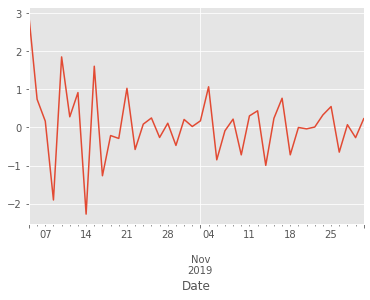

In [ ]:
# plot the differenced equity returns
equity_returns_diff.plot() # this looks more stationary

Extract the October and November data from each of the ETF series.

In [ ]:
gold_returns_october_diff = gold_returns_diff[:"2019-10-31"]
gold_returns_november_diff = gold_returns_diff["2019-11-01":]
#print(gold_returns_october.shape)
#print(gold_returns_november.shape)

In [ ]:
equity_returns_october_diff = equity_returns_diff[:"2019-10-31"]
equity_returns_november_diff = equity_returns_diff["2019-11-01":]
#print(equity_returns_october.shape)
#print(equity_returns_november.shape)

Fit the GARCH(1,1) model

In [ ]:
!pip install arch

from arch import arch_model

def garch_model(data):
  model = arch_model(data, mean='constant', vol='GARCH', p=1, q=1)
  model_fit = model.fit(update_freq=5, disp='off')
  return model_fit.summary()

     |████████████████████████████████| 798kB 7.7MB/s 


In [ ]:
# fit the model on october gold ETF
gold_garch_oct = garch_model(gold_returns_october_diff)
print(gold_garch_oct)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -24.9484
Distribution:                  Normal   AIC:                           57.8969
Method:            Maximum Likelihood   BIC:                           62.0750
                                        No. Observations:                   21
Date:                Mon, Jan 11 2021   Df Residuals:                       17
Time:                        17:11:06   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0115      0.188  6.137e-02      0.951 [ -0.357,  0.38

In [ ]:
# fit the model on november gold etf
gold_garch_nov = garch_model(gold_returns_november_diff)
print(gold_garch_nov)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -24.9716
Distribution:                  Normal   AIC:                           57.9432
Method:            Maximum Likelihood   BIC:                           61.9261
                                        No. Observations:                   20
Date:                Mon, Jan 11 2021   Df Residuals:                       16
Time:                        17:11:06   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0149      0.112      0.133      0.894 [ -0.204,  0.23

In [ ]:
# fit the model on october equity etf
equity_garch_oct = garch_model(equity_returns_october_diff)
print(equity_garch_oct)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.025
Mean Model:             Constant Mean   Adj. R-squared:                 -0.025
Vol Model:                      GARCH   Log-Likelihood:               -27.5817
Distribution:                  Normal   AIC:                           63.1634
Method:            Maximum Likelihood   BIC:                           67.3415
                                        No. Observations:                   21
Date:                Mon, Jan 11 2021   Df Residuals:                       17
Time:                        17:11:06   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0422  7.135e-02     -0.591      0.555 [ -0.182,

In [ ]:
# fit the model on november equity ETF
equity_garch_nov = garch_model(equity_returns_november_diff)
print(equity_garch_nov)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -15.7844
Distribution:                  Normal   AIC:                           39.5687
Method:            Maximum Likelihood   BIC:                           43.7468
                                        No. Observations:                   21
Date:                Mon, Jan 11 2021   Df Residuals:                       17
Time:                        17:11:06   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         1.3215e-03      0.123  1.074e-02      0.991 [ -0.240,  0.24

7.8 What are the significant changes, if any?  Be specific with regards to the values of the parameters!

Model fit statistics used as a metric to assess how well the model fit the data are the AIC and BIC. The AIC for all the models had lower values than the BIC values with model 4 recording the lowest AIC. It is also worthy to note that using the BIC as a metric when analyzing small datasets might have its downsides as it is more likely to choose models that are too simple. Also, the beta values are all less than one, which is a good occurrence as a beta value greater than one will produce a small shock that gets louder with time, and it will cause the variance to spiral to higher levels with the possibility of reaching infinite variance.

Furthermore, looking at the volatility model coefficients, we can see that they satisfy the conditions for a GARCH(1,1) model.
1. Omega, Alpha, and Beta are all positive.
2. alpha + beta values are less than One.

# 8. Correlation

In [ ]:
# Compute the Pearson correlation between the gold and equity returns in October?  Repeat for November.
import scipy.stats
# Pearson Correlation October
october_rho = scipy.stats.pearsonr(gold_returns[:"2019-11-01"], equity_returns[:"2019-11-01"])
print(october_rho)
# Pearson Correlation November
november_rho = gold_returns["2019-11-01":].corr(equity_returns["2019-11-01":])
print(november_rho)

(-0.6746333469690574, 0.0004142619823891931)
-0.30226283803395776
